<a href="https://colab.research.google.com/gist/saleamlakw/becfa37442018341fa1da694a0069644/ethiopian-athletes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import important libraries for the data reading and cleaning

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img=cv2.imread('/content/drive/MyDrive/ethio image classifier/dataset/Haile Gebrselassie/0514b15c-051115-OLYMPIC-Haile-Gebrselassie-of-Ethiopia-smiles-AS-PI.jpg')
img.shape

(1280, 1280, 3)

Here we see that the image has 3 dimensions. The first dimension is height (450 pixels) and the second is width (also 600 pixels). The presence of a third dimension indicates that we are looking at a color image (“RGB”, or Red, Green, Blue).

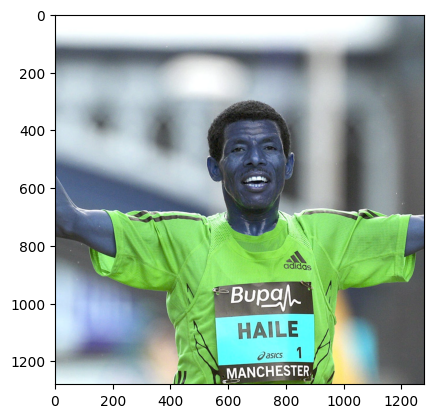

In [ ]:
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1280, 1280)

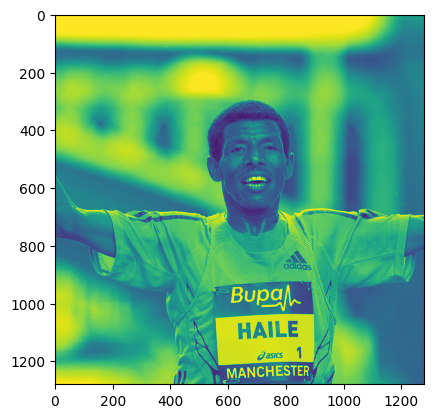

In [ ]:
plt.imshow(gray)

Converting an image to grayscale is a common preprocessing step in machine learning tasks involving computer vision or image analysis. There are several reasons why grayscale images are used in machine learning:

*   
    Dimensionality reduction: Grayscale images have only one color channel instead of three (as in RGB images). By converting an image to grayscale, you reduce the dimensionality of the image data, which can simplify the learning process and reduce computational requirements.



*  Simplified features: Grayscale images contain only intensity information, while color images also have color variations. By removing color, the focus shifts to the structural and textural features present in the image. This simplification can help machine learning algorithms to better capture the relevant patterns and improve performance.
*    Invariance to color variations: Grayscale images are not affected by color variations or lighting conditions, making them more robust in certain scenarios. For example, if an algorithm needs to detect objects or patterns based on their shape or texture rather than color, grayscale images can be sufficient.
* Computational efficiency: Working with grayscale images can be computationally more efficient compared to RGB images since there is less data to process. This can lead to faster training times and inference during machine learning tasks.

 ✅I used  Haar cascade classifier to detect face ,eye in the image and to crop the images
 link to understand haar cascade algorithm:https://www.analyticsvidhya.com/blog/2022/04/object-detection-using-haar-cascade-opencv/

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

the above code snippet initializes two instances of the CascadeClassifier class from the OpenCV library. both
'haarcascade_frontalface_default.xml' and 'haarcascade_eye.xml'  contains pre-trained data for detecting frontal faces and  eyes respectively.

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #return list of rectangles that represent the detected faces in the image
faces

array([[555, 357, 274, 274]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(555, 357, 274, 274)

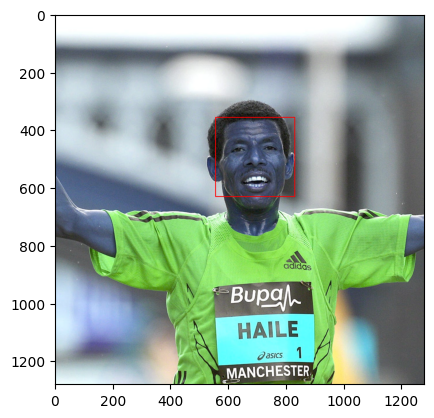

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

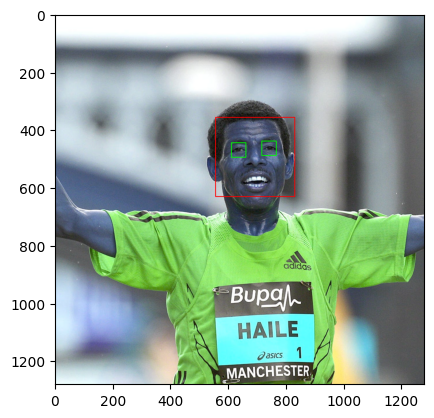

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

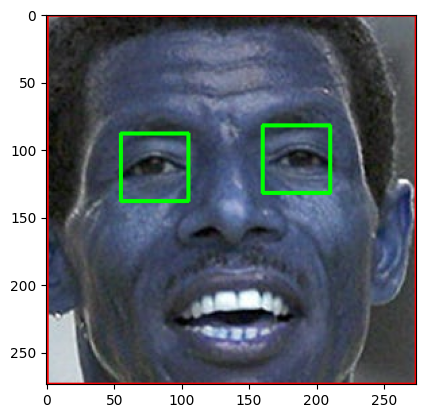

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(274, 274, 3)

In [ ]:
#this function performs all the above listed steps: face detection,eye detection and face croping
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
path_to_data = "/content/drive/MyDrive/ethio image classifier/dataset"
path_to_cr_data = "/content/drive/MyDrive/ethio image classifier/dataset/croped/"

In [ ]:
#this code sinppet used to append the name of all directories in the dataset in to img_dir list
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/ethio image classifier/dataset/kenenisa bekele',
 '/content/drive/MyDrive/ethio image classifier/dataset/Haile Gebrselassie',
 '/content/drive/MyDrive/ethio image classifier/dataset/tirunesh dibaba',
 '/content/drive/MyDrive/ethio image classifier/dataset/loza abera (1)',
 '/content/drive/MyDrive/ethio image classifier/dataset/abubeker nasir']

In [ ]:
#check if path_to_cr_data exists and create path_to_cr_data path.
# if the path alrady exists the code will delete the existing path and will recreate it again
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
"""this code iterates over all our dataset and check if our image has face and eye if so it crop
the image and save it in another diractory """
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        # print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

kenenisa bekele
Generating cropped images in folder:  /content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele
Haile Gebrselassie
Generating cropped images in folder:  /content/drive/MyDrive/ethio image classifier/dataset/croped/Haile Gebrselassie
tirunesh dibaba
Generating cropped images in folder:  /content/drive/MyDrive/ethio image classifier/dataset/croped/tirunesh dibaba
loza abera (1)
Generating cropped images in folder:  /content/drive/MyDrive/ethio image classifier/dataset/croped/loza abera (1)
abubeker nasir
Generating cropped images in folder:  /content/drive/MyDrive/ethio image classifier/dataset/croped/abubeker nasir


# **Feature engineering**
new feature extraction from an image using wavelet transformation.

In [ ]:
"""
# **steps of wavelet transform using sample example **
# **->Original RGB Image:**
[ [ 150, 80, 200, 210 ]
  [ 100, 180, 70, 120 ],
  [ 60, 130, 190, 40 ],
  [ 170, 50, 90, 160 ] ]
# **->Grayscale Image:**
convert the rgb image to gray scale image
[ 120  153  127  195 ]
[ 153  137  118  133 ]
[ 120  140  118   82 ]
[ 123   85  123  133 ]
# **->Conversion to Float:**
[ 120.0  153.0  127.0  195.0 ]
[ 153.0  137.0  118.0  133.0 ]
[ 120.0  140.0  118.0   82.0 ]
[ 123.0   85.0  123.0  133.0 ]
# **->Normalization**:
scaling the image between 0 and 1.
[ 0.47058824  0.6         0.49803922  0.76470588 ]
[ 0.6         0.5372549   0.4627451   0.52156863 ]
[ 0.47058824  0.54901961  0.4627451   0.32156863 ]
[ 0.48235294  0.33333333  0.48235294  0.52156863 ]
# **->one level of decomposition using the Haar wavelet **
Level 1 Approximation Coefficients (LL):

[ 0.49803922  0.71372549 ]
[ 0.56862745  0.49215686 ]

Level 1 Horizontal Detail Coefficients (LH):

[ -0.07058824  -0.00784314 ]
[  0.00392157   0.00392157 ]

Level 1 Vertical Detail Coefficients (HL):

[ -0.00784314  -0.01176471 ]
[  0.05882353   0.00392157 ]

Level 1 Diagonal Detail Coefficients (HH):

[ -0.07058824   0.08235294 ]
[ -0.02352941   0.00392157 ]
# **->modifying the approximation coefficients (LL) by multiplying them by 0.**
The purpose of setting the approximation coefficients to 0 is  to remove or suppress the low-frequency information from the image.
Modified Level 1 Approximation Coefficients (LL):
[ 0.  0. ]
[ 0.  0. ]
# **->perform the inverse wavelet transform to reconstruct the image from the modified coefficients.**
# **->The reconstructed image is rescaled by multiplying by 255 to bring the pixel values back to the range [0, 255].**
# **->The data type of the reconstructed image is converted to np.uint8, which represents an 8-bit unsigned integer.**
# **->The reconstructed image is returned**
"""

'\n# **steps of wavelet transform using sample example **\n# **->Original RGB Image:**\n[ [ 150, 80, 200, 210 ]\n  [ 100, 180, 70, 120 ],\n  [ 60, 130, 190, 40 ],\n  [ 170, 50, 90, 160 ] ]\n# **->Grayscale Image:**\nconvert the rgb image to gray scale image \n[ 120  153  127  195 ]\n[ 153  137  118  133 ]\n[ 120  140  118   82 ]\n[ 123   85  123  133 ]\n# **->Conversion to Float:**\n[ 120.0  153.0  127.0  195.0 ]\n[ 153.0  137.0  118.0  133.0 ]\n[ 120.0  140.0  118.0   82.0 ]\n[ 123.0   85.0  123.0  133.0 ]\n# **->Normalization**:\nscaling the image between 0 and 1.\n[ 0.47058824  0.6         0.49803922  0.76470588 ]\n[ 0.6         0.5372549   0.4627451   0.52156863 ]\n[ 0.47058824  0.54901961  0.4627451   0.32156863 ]\n[ 0.48235294  0.33333333  0.48235294  0.52156863 ]\n# **->one level of decomposition using the Haar wavelet **\nLevel 1 Approximation Coefficients (LL):\n\n[ 0.49803922  0.71372549 ]\n[ 0.56862745  0.49215686 ]\n\nLevel 1 Horizontal Detail Coefficients (LH):\n\n[ -0.070

In [ ]:
import numpy as np
import pywt
import cv2
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

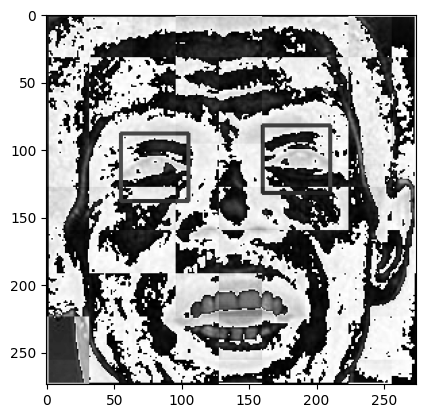

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
#append the list of image directory of each celebrity in to dictionary
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'kenenisa bekele': ['/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele1.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele2.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele3.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele4.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele5.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele6.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele7.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele8.png',
  '/content/drive/MyDrive/ethio image classifier/dataset/croped/kenenisa bekele/kenenisa bekele9.png',
  '/content/drive/MyDrive/ethio image classifier/datas

In [ ]:
#assign number to each celebrity
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
      class_dict[celebrity_name] = count
      count = count + 1
class_dict

NameError: ignored

In [ ]:
#extract feature using wavelet transform and vertical stack the orginal image and the tranformed image using numpy .
#prepare the data for training by classifing the verticaliy stacked image as input and the name of the celebrities as output.
xx, yy = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        xx.append(combined_img)
        yy.append(class_dict[celebrity_name])

In [ ]:
xx = np.array(xx).reshape(len(xx),4096).astype(float)
xx.shape

(96, 4096)

In [ ]:
len(yy)

96

Model selection and Training

In [ ]:
#importing important libraries for model training and evaluation
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
#spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(xx, yy, random_state=0)

NameError: ignored